In [1]:
#domestic gross % by genre
#read in csv file
import pandas as pd
import os
os.getcwd()

'C:\\Users\\jchen\\Documents\\Udemy\\Python'

In [99]:
hw = pd.read_csv("Section6_Homework_Data.csv",encoding = "ISO-8859-1")

In [100]:
hw.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [101]:
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

In [102]:
#modify var names
hw.columns = ['weekday', 'director','genre','title','releaseDate','studio','adjGross','budget', 'gross', \
              'IMDb', 'movieLens', 'overseas', 'overseasPct', 'profit', 'profitPct', 'runtime', 'US', 'grossUSPct']
#trun genre to category
#hw.genre = hw.genre.astype('category')
#hw.studio = hw.studio.astype('category')

In [103]:
#import sns
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#turn on the edge color
plt.rcParams["patch.force_edgecolor"] = True

In [77]:
#boxplot begin
#sns.boxplot(hw, x='genre', y='grossUSPct')
#sns.jointplot(data=hw, x='genre', y = 'grossUSPct')
#hw.genre.cat.categories
#hw.studio.cat.categories

Index(['Art House Studios', 'Buena Vista Studios', 'Colombia Pictures',
       'Dimension Films', 'Disney', 'DreamWorks', 'Fox',
       'Fox Searchlight Pictures', 'Gramercy Pictures', 'IFC', 'Lionsgate',
       'Lionsgate Films', 'Lionsgate/Summit', 'MGM', 'MiraMax',
       'New Line Cinema', 'New Market Films', 'Orion',
       'Pacific Data/DreamWorks', 'Paramount Pictures', 'Path_ Distribution',
       'Relativity Media', 'Revolution Studios', 'Screen Gems', 'Sony',
       'Sony Picture Classics', 'StudioCanal', 'Summit Entertainment',
       'TriStar', 'UA Entertainment', 'USA', 'Universal', 'Vestron Pictures',
       'WB', 'WB/New Line', 'Weinstein Company'],
      dtype='object')

In [104]:
genreList = ['action', 'comedy', 'adventure', 'animation', 'drama']
studioList = ['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox']
hw1 = hw[hw.genre.isin(genreList)]
hw1 = hw1[hw1.studio.isin(studioList)]

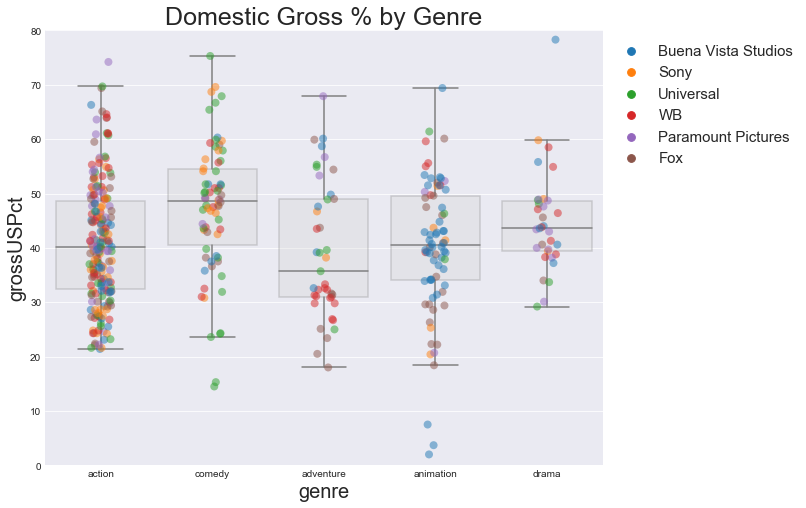

In [117]:
#hw.genre.isin(genreList)
sns.set_style('darkgrid')

fig, ax=plt.subplots(figsize=(10,8), sharex=True, sharey=True)
#fig.set_size_inches(11.7, 8.27)
plt.ylabel('Gross % US', fontsize=20)
plt.xlabel('Genre', fontsize=20)
plt.title('Domestic Gross % by Genre', fontsize=25)


k1 = sns.boxplot(data=hw1, x='genre', y = 'grossUSPct',\
                 showfliers=False,boxprops=dict(alpha=.3), color='lightgrey')#,\
            #showfliers=False, boxprops=dict(alpha=.3), ax=ax[0])
k1.set(ylim=(0,80))
k1b = sns.stripplot(data=hw1, x='genre', y = 'grossUSPct',size=8, alpha=.5,\
                hue = 'studio', jitter=True )
plt.legend(bbox_to_anchor=(1,1),fontsize=15)
plt.show()


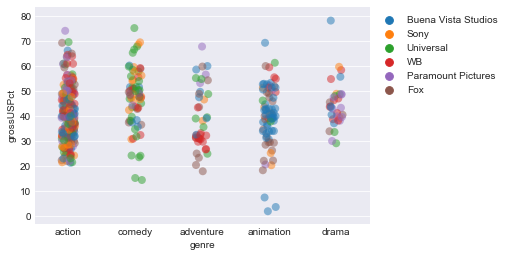

In [113]:
k1b = sns.stripplot(data=hw1, x='genre', y = 'grossUSPct', size=8, alpha=.5,\
                hue = 'studio', jitter=True )
plt.legend(bbox_to_anchor=(1,1))
# plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1,\
#            prop={'size':20})
# handles, labels = k1b.get_legend_handles_labels()
# k1b.lengend(handles,studioList)